# Data Cleaning

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
df= pd.read_csv("Flourish OA.txt")

In [194]:
df.head()

,issn,journal_name,pub_name,is_hybrid,category,url
0,0001-527X,Acta Biochimica Polonica,ACTA BIOCHIMICA POLONICA,0,MOLECULAR AND CELL BIOLOGY,NaN
1,0002-0397,Africa Spectrum,NaN,0,NaN,NaN
2,0003-0090,Bulletin of the American Museum of Natural His...,AMER MUSEUM NATURAL HISTORY,0,ECOLOGY AND EVOLUTION,NaN
3,0003-5521,L'anthropologie,Elsevier,1,Anthropology,NaN
4,0004-1254,Arhiv Za Higijenu Rada I Toksikologiju-Archive...,NaN,0,NaN,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   issn          13149 non-null  object
 1   journal_name  13149 non-null  object
 2   pub_name      11679 non-null  object
 3   is_hybrid     13149 non-null  int64 
 4   category      6818 non-null   object
 5   url           6361 non-null   object
dtypes: int64(1), object(5)
memory usage: 616.5+ KB


In [196]:
df.isnull().any()

issn            False
journal_name    False
pub_name         True
is_hybrid       False
category         True
url              True
dtype: bool

In [197]:
df[['pub_name','category','url']]

,pub_name,category,url
0,ACTA BIOCHIMICA POLONICA,MOLECULAR AND CELL BIOLOGY,NaN
1,NaN,NaN,NaN
2,AMER MUSEUM NATURAL HISTORY,ECOLOGY AND EVOLUTION,NaN
3,Elsevier,Anthropology,NaN
4,NaN,NaN,NaN
...,...,...,...
13144,NaN,NaN,NaN
13145,NaN,NaN,NaN
13146,NaN,NaN,NaN
13147,NaN,NaN,NaN


In [198]:
 df['category'].dropna()

0              MOLECULAR AND CELL BIOLOGY
2                   ECOLOGY AND EVOLUTION
3                            Anthropology
6                                ROBOTICS
9                   Physics and Chemistry
                       ...               
12920    Philosophy. Psychology. Religion
12921    Philosophy. Psychology. Religion
12922                           Fine Arts
12923                             Science
13135                            MEDICINE
Name: category, Length: 6818, dtype: object

In [199]:
df['pub_name'].replace("Null",np.NaN)

0           ACTA BIOCHIMICA POLONICA
1                                NaN
2        AMER MUSEUM NATURAL HISTORY
3                           Elsevier
4                                NaN
                    ...             
13144                            NaN
13145                            NaN
13146                            NaN
13147                            NaN
13148                            NaN
Name: pub_name, Length: 13149, dtype: object

In [200]:
df.dropna(inplace=True,subset=['pub_name','category','url'])

In [201]:
dt.shape

(6297, 6)

In [202]:
df.shape

(6297, 6)

In [203]:
df['category'].fillna(method="ffill",inplace=True)

In [204]:
df['category'].fillna(value=df['category'].mode(dropna=True),method=None)

56                            Agriculture
199                       Social Sciences
286                      Literary Studies
366                               Science
367      Philosophy. Psychology. Religion
                       ...               
12919    Philosophy. Psychology. Religion
12920    Philosophy. Psychology. Religion
12921    Philosophy. Psychology. Religion
12922                           Fine Arts
12923                             Science
Name: category, Length: 6297, dtype: object

In [205]:
df['category'].mode(dropna=True)

0    Medicine
dtype: object

In [206]:
from sklearn.impute import SimpleImputer

In [207]:
imput= SimpleImputer(strategy='median')

In [208]:
from sklearn.impute import SimpleImputer
imput= SimpleImputer(strategy="most_frequent")
display(imput.fit_transform(df[['category']]))
print()
display(imput.statistics_)

array([['Agriculture'],
       ['Social Sciences'],
       ['Literary Studies'],
       ...,
       ['Philosophy. Psychology. Religion'],
       ['Fine Arts'],
       ['Science']], dtype=object)

array(['Medicine'], dtype=object)

In [209]:
imput.statistics_

array(['Medicine'], dtype=object)

In [210]:
"Springer" in df['pub_name'].unique()

True

In [211]:
'Springer' in df['category']

False

In [212]:
from fuzzywuzzy import process,fuzz

In [213]:
from fuzzywuzzy import process,fuzz
fuzz.WRatio("Europe","eur")

90

In [233]:
df.dropna(inplace=True)
df['category']

56                            Agriculture
199                       Social Sciences
286                      Literary Studies
366                               Science
367      Philosophy. Psychology. Religion
                       ...               
12919    Philosophy. Psychology. Religion
12920    Philosophy. Psychology. Religion
12921    Philosophy. Psychology. Religion
12922                           Fine Arts
12923                             Science
Name: category, Length: 6297, dtype: object

In [242]:
kat= df['category'].unique()

In [252]:
for i in kat:
    df.loc[df['category']==i,'category']= "shj"+i+"afr"

In [ ]:
from fuzzywuzzy import process
# kat is a list of categories which is correct 
for val in kat:
    match= process.extract(val,df['category'],limit=df.shape[0])
    for poten_match in match:
        if poten_match[1]>80:
            df.loc[df['category']==poten_match[0],"category"]=val
        break

In [ ]:
frame=pd.DataFrame({
    "Country":["Russia","Rus","United States of America","America","nederland","Ned."]
})
frame

In [ ]:
frame

## Finding outlier with boxplot

In [ ]:
df=sns.load_dataset("iris")

In [ ]:
sns.boxplot(y='petal_length',x='species',data=df)

In [ ]:
df.drop(columns=["species"]).columns

## Finding Outliers with IsolationForest

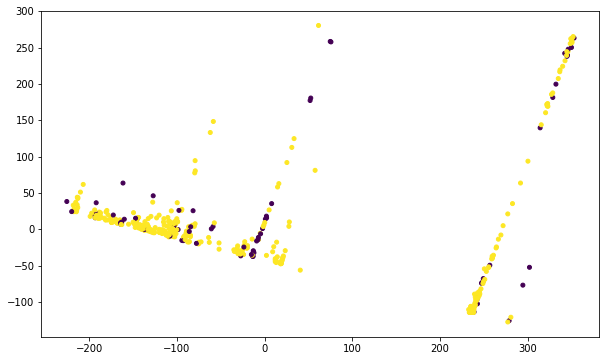

In [257]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
df= pd.read_csv("raw_data.txt")
iso= IsolationForest(n_estimators=100)
prediction= iso.fit_predict(df)

pca= PCA(n_components=2)
transformed= pca.fit_transform(df)
plt.figure(figsize=(10,6))
plt.scatter(transformed[:,0],transformed[:,1],c=prediction,s=16)

## Finding Outlier with LOF

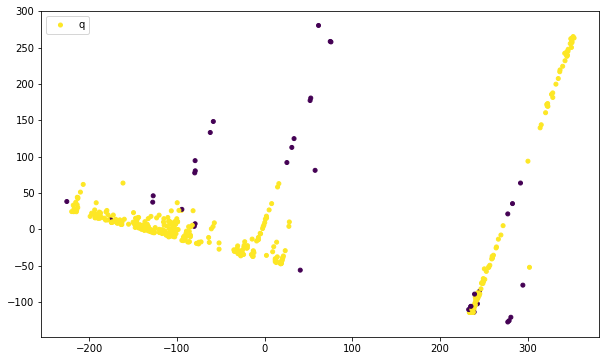

In [258]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
outlier= LocalOutlierFactor()
predict_LOF= outlier.fit_predict(df)

pca= PCA(n_components=2)
transformed= pca.fit_transform(df)
plt.figure(figsize=(10,6))
plt.scatter(transformed[:,0],transformed[:,1],c=predict_LOF,s=16)
plt.legend(loc='upper left',labels=["q","f"])